In [2]:
import numpy as np
from grakel.datasets import fetch_dataset
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel.kernels import SubgraphMatching, GraphletSampling, ShortestPath, RandomWalk
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataname = 'COLLAB'

print(f'Fetching {dataname} dataset...')
data = fetch_dataset(dataname.upper(), verbose=False, prefer_attr_nodes=False, produce_labels_nodes=True)
print(f'Finish fetching!')
G, y = data.data, data.target

Fetching COLLAB dataset...
Finish fetching!


In [16]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.2, random_state=42)

In [17]:
# y_min, y_max = np.unique(y_train)
# y_min, y_max
y1, y2, y3 = np.unique(y_train)
y1, y2, y3

(1, 2, 3)

In [18]:
G_train_adj = np.row_stack([np.array(G_train)[np.where(y_train == y1)[0].astype(np.uint64)],
                            np.array(G_train)[np.where(y_train == y2)[0].astype(np.uint64)],
                            np.array(G_train)[np.where(y_train == y3)[0].astype(np.uint64)]])
G_test_adj = np.row_stack([np.array(G_test)[np.where(y_test == y1)[0].astype(np.uint64)],
                            np.array(G_test)[np.where(y_test == y2)[0].astype(np.uint64)],
                            np.array(G_test)[np.where(y_test == y3)[0].astype(np.uint64)]])

In [11]:
y_train_adj = np.concatenate([y_train[np.argwhere(y_train == y1).ravel()],
                            y_train[np.argwhere(y_train == y2).ravel()],
                            y_train[np.argwhere(y_train == y3).ravel()]])
y_test_adj = np.concatenate([y_test[np.argwhere(y_test == y1).ravel()],
                            y_test[np.argwhere(y_test == y2).ravel()],
                            y_test[np.argwhere(y_test == y3).ravel()]])

In [19]:
[len(np.where(y_train == y1)[0]), len(np.where(y_train == y2)[0]), len(np.where(y_train == y3)[0]), len(G_train_adj),
len(np.where(y_test == y1)[0]), len(np.where(y_test == y2)[0]), len(np.where(y_test == y3)[0]), len(G_test_adj)]

[2083, 614, 1303, 4000, 517, 161, 322, 1000]

In [20]:
def get_WL(G, G_test, iter_num = 1):
    wl_kernel = WeisfeilerLehman(n_iter=iter_num, normalize=True, base_graph_kernel=VertexHistogram)
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'WL-{iter_num} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'WL-{iter_num} test')
    plt.show()

    return K, K_test

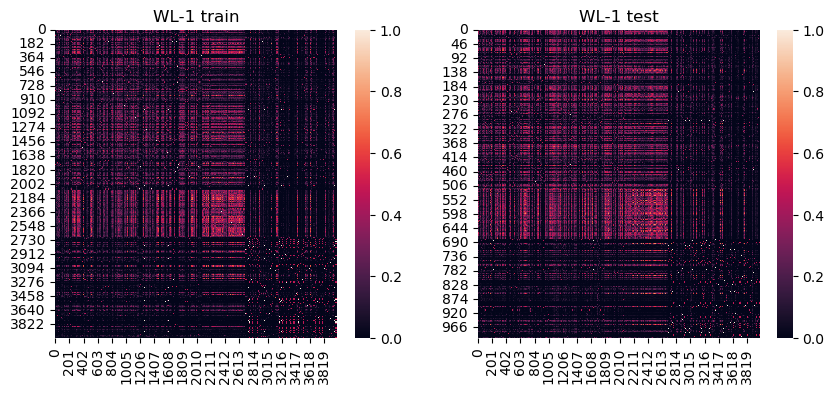

In [21]:
K_WL_1, K_WL_1_test = get_WL(G_train_adj, G_test_adj, 1)

In [22]:
u, s, vh = np.linalg.svd(K_WL_1, full_matrices=False)
min(s), max(s)

(1.5488500721758195e-16, 539.6346449660962)

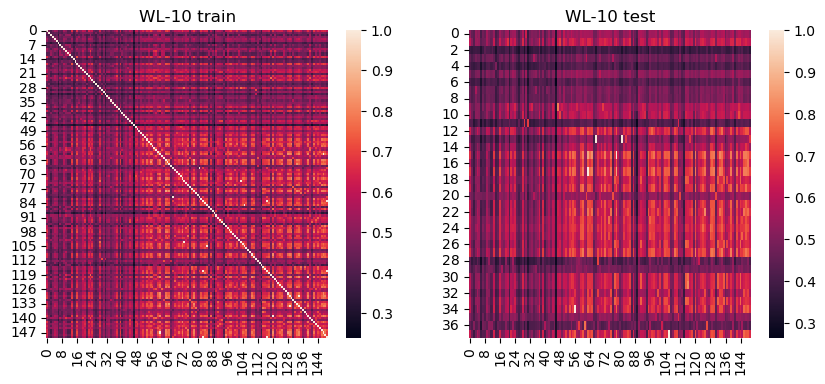

In [142]:
K_WL_10, K_WL_10_test = get_WL(G_train_adj, G_test_adj, 10)

In [143]:
u, s, vh = np.linalg.svd(K_WL_10, full_matrices=False)
min(s), max(s)

(8.781252904734302e-17, 81.49483438496488)

In [23]:
def get_GS(G, G_test, k_num = 4):
    wl_kernel = GraphletSampling(normalize=True, k=k_num)
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'GS-{k_num} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'GS-{k_num} test')
    plt.show()
    
    return K, K_test

In [24]:
K_GS_5, K_GS_5_test = get_GS(G_train_adj, G_test_adj, 5)
# 43min+

Done fitting
Start plotting


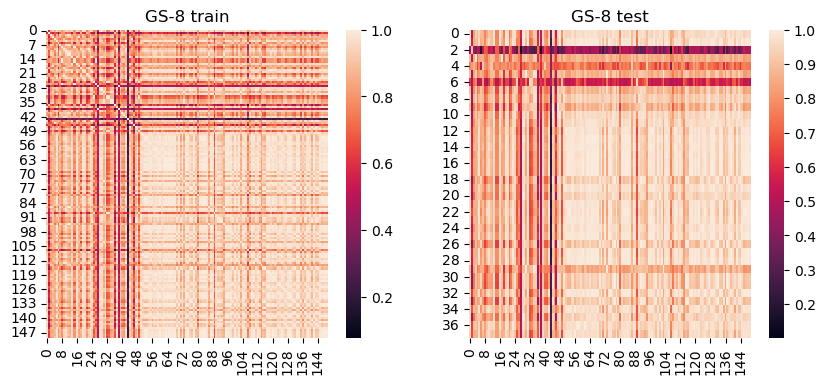

In [146]:
K_GS_8, K_GS_8_test = get_GS(G_train_adj, G_test_adj, 8)

In [147]:
def get_SP(G, G_test):
    wl_kernel = ShortestPath(normalize=True, algorithm_type="floyd_warshall")
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'SP train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'SP test')
    plt.show()
    
    return K, K_test

Done fitting
Start plotting


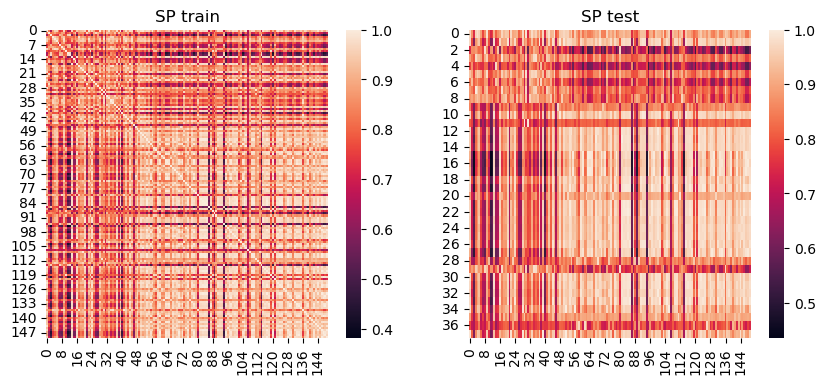

In [148]:
K_SP, K_SP_test = get_SP(G_train_adj, G_test_adj)

In [149]:
def get_RW(G, G_test, lambda_value = 0.1):
    wl_kernel = RandomWalk(lamda=lambda_value, normalize=True, kernel_type="exponential")
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'RW-{lambda_value} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'RW-{lambda_value} test')
    plt.show()
    
    return K, K_test

Done fitting
Start plotting


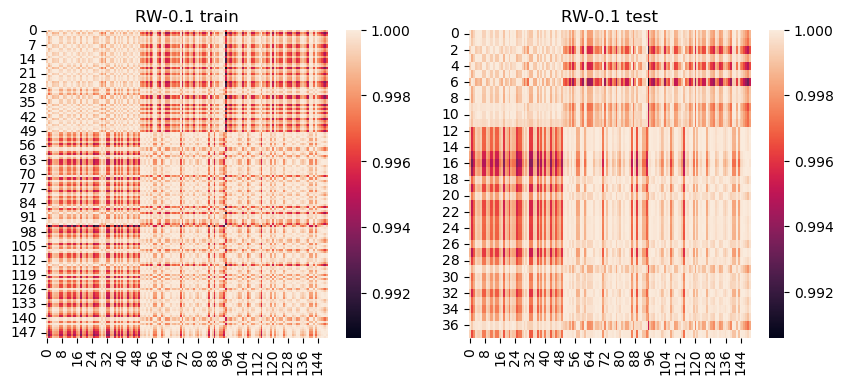

In [150]:
K_RW_01, K_RW_01_test = get_RW(G_train_adj, G_test_adj, 0.1)

Done fitting
Start plotting


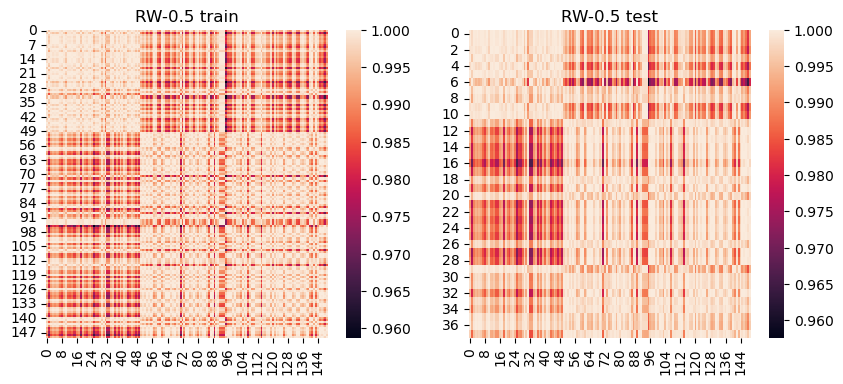

In [157]:
K_RW_05, K_RW_05_test = get_RW(G_train_adj, G_test_adj, 0.5)

In [90]:
from sklearn.svm import OneClassSVM, SVC
from sklearn.metrics import roc_auc_score, accuracy_score

In [182]:
def perform_SVC(K, K_test):
    # Uses the SVM classifier to perform classification
    clf = SVC(kernel="precomputed", tol=1e-6, probability = True)
    print('start fitting oneclassSVM...')
    clf.fit(K, y_train_adj)

    y_train_pred_proba = clf.predict_proba(K)
    y_train_pred = clf.classes_[np.argmax(y_train_pred_proba, axis = 1)]
    print("Train:", y_train_pred)
    print("Test ACC: %.3f"%(accuracy_score(y_train_adj, y_train_pred)))

    y_test_pred_proba = clf.predict_proba(K_test)
    y_test_pred = clf.classes_[np.argmax(y_test_pred_proba, axis = 1)]
    print("Test:",y_test_pred)
    print("Test ACC: %.3f"%(accuracy_score(y_test_adj, y_test_pred)))

In [183]:
perform_SVC(K_RW_05, K_RW_05_test)

start fitting oneclassSVM...
Train: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1
  1  1  1  1  1  1]
Test ACC: 0.827
Test: [-1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]
Test ACC: 0.895


In [184]:
perform_SVC(K_RW_01, K_RW_01_test)

start fitting oneclassSVM...
Train: [-1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1 -1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1
  1  1  1  1  1  1]
Test ACC: 0.800
Test: [-1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1]
Test ACC: 0.868


In [185]:
perform_SVC(K_SP, K_SP_test)

start fitting oneclassSVM...
Train: [ 1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Test ACC: 0.800
Test: [-1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]
Test ACC: 0.868


In [186]:
perform_SVC(K_GS_8, K_GS_8_test)

start fitting oneclassSVM...
Train: [ 1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Test ACC: 0.813
Test: [ 1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]
Test ACC: 0.816


In [187]:
perform_SVC(K_GS_5, K_GS_5_test)

start fitting oneclassSVM...
Train: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Test ACC: 0.660
Test: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Test ACC: 0.684


In [188]:
perform_SVC(K_WL_10, K_WL_10_test)

start fitting oneclassSVM...
Train: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Test ACC: 0.940
Test: [-1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1]
Test ACC: 0.895


In [189]:
perform_SVC(K_WL_1, K_WL_1_test)

start fitting oneclassSVM...
Train: [ 1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1
  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Test ACC: 0.780
Test: [-1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1]
Test ACC: 0.842


start fitting oneclassSVM...
Train: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Test ACC: 1.000
Test: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1]
Test ACC: 0.921


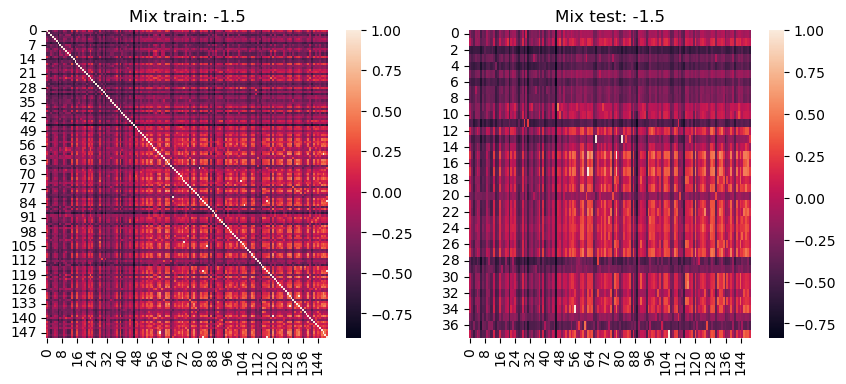

In [219]:
alpha = - 1.5
# K_normalized = alpha * scaler.fit_transform(K_RW_001) + (1-alpha) * scaler.fit_transform(K_WL_10) 
K_normalized = alpha * K_RW_05 + (1-alpha) * K_WL_10 #+ 0.5 * K_SP
K_normalized_test = alpha * K_RW_05_test + (1-alpha) * K_WL_10_test #+ 0.5 * K_SP_test
perform_SVC(K_normalized, K_normalized_test)

plt.figure(1, (10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(K_normalized)
plt.title(f'Mix train: {alpha}')
plt.subplot(1, 2, 2)
sns.heatmap(K_normalized_test)
plt.title(f'Mix test: {alpha}')
plt.show()

In [220]:
u, s, vh = np.linalg.svd(K_normalized, full_matrices=False)
min(s), max(s)

(8.224280245671012e-16, 35.21740615920297)